## 1.Importing Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme()
sns.set_style('whitegrid')
sns.set_palette(['#FF5F5D', '#3F7C85', '#00CCBF', '#72F2EB', '#747E7E'])

import sklearn
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df= pd.read_csv("dynamic_pricing.csv")

## 2.data quality check

In [ ]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [ ]:
df.dtypes

Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [ ]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [ ]:
df.count()

Number_of_Riders           1000
Number_of_Drivers          1000
Location_Category          1000
Customer_Loyalty_Status    1000
Number_of_Past_Rides       1000
Average_Ratings            1000
Time_of_Booking            1000
Vehicle_Type               1000
Expected_Ride_Duration     1000
Historical_Cost_of_Ride    1000
dtype: int64

In [ ]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


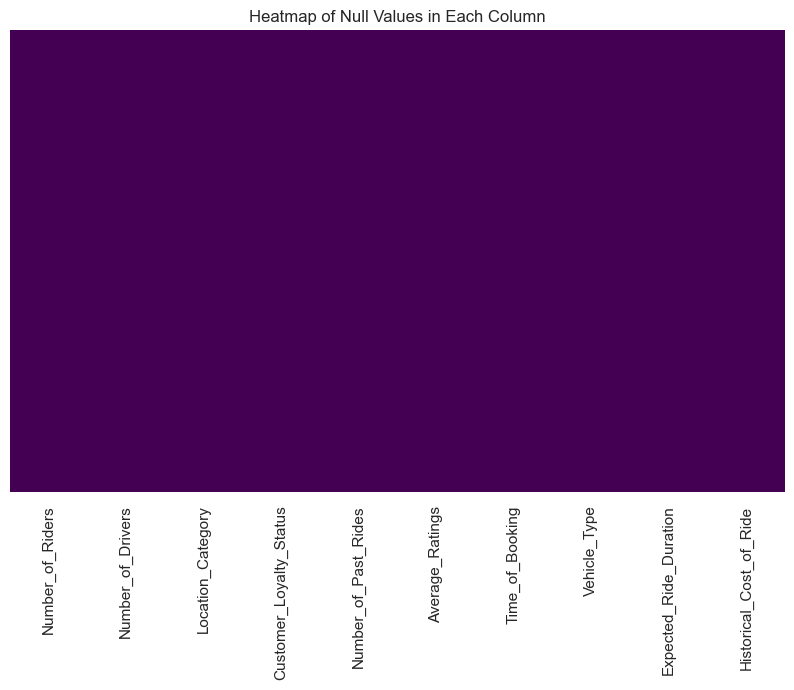

In [ ]:
null_values = df.isnull()

plt.figure(figsize=(10, 6))
sns.heatmap(null_values, cbar=False, cmap='viridis', yticklabels=False, xticklabels=df.columns)
plt.title('Heatmap of Null Values in Each Column')
plt.show()


## 3. Analyzing the distribution of numerical features to understand their distribution.

In [ ]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


## 4. Plot distributions for numerical features.

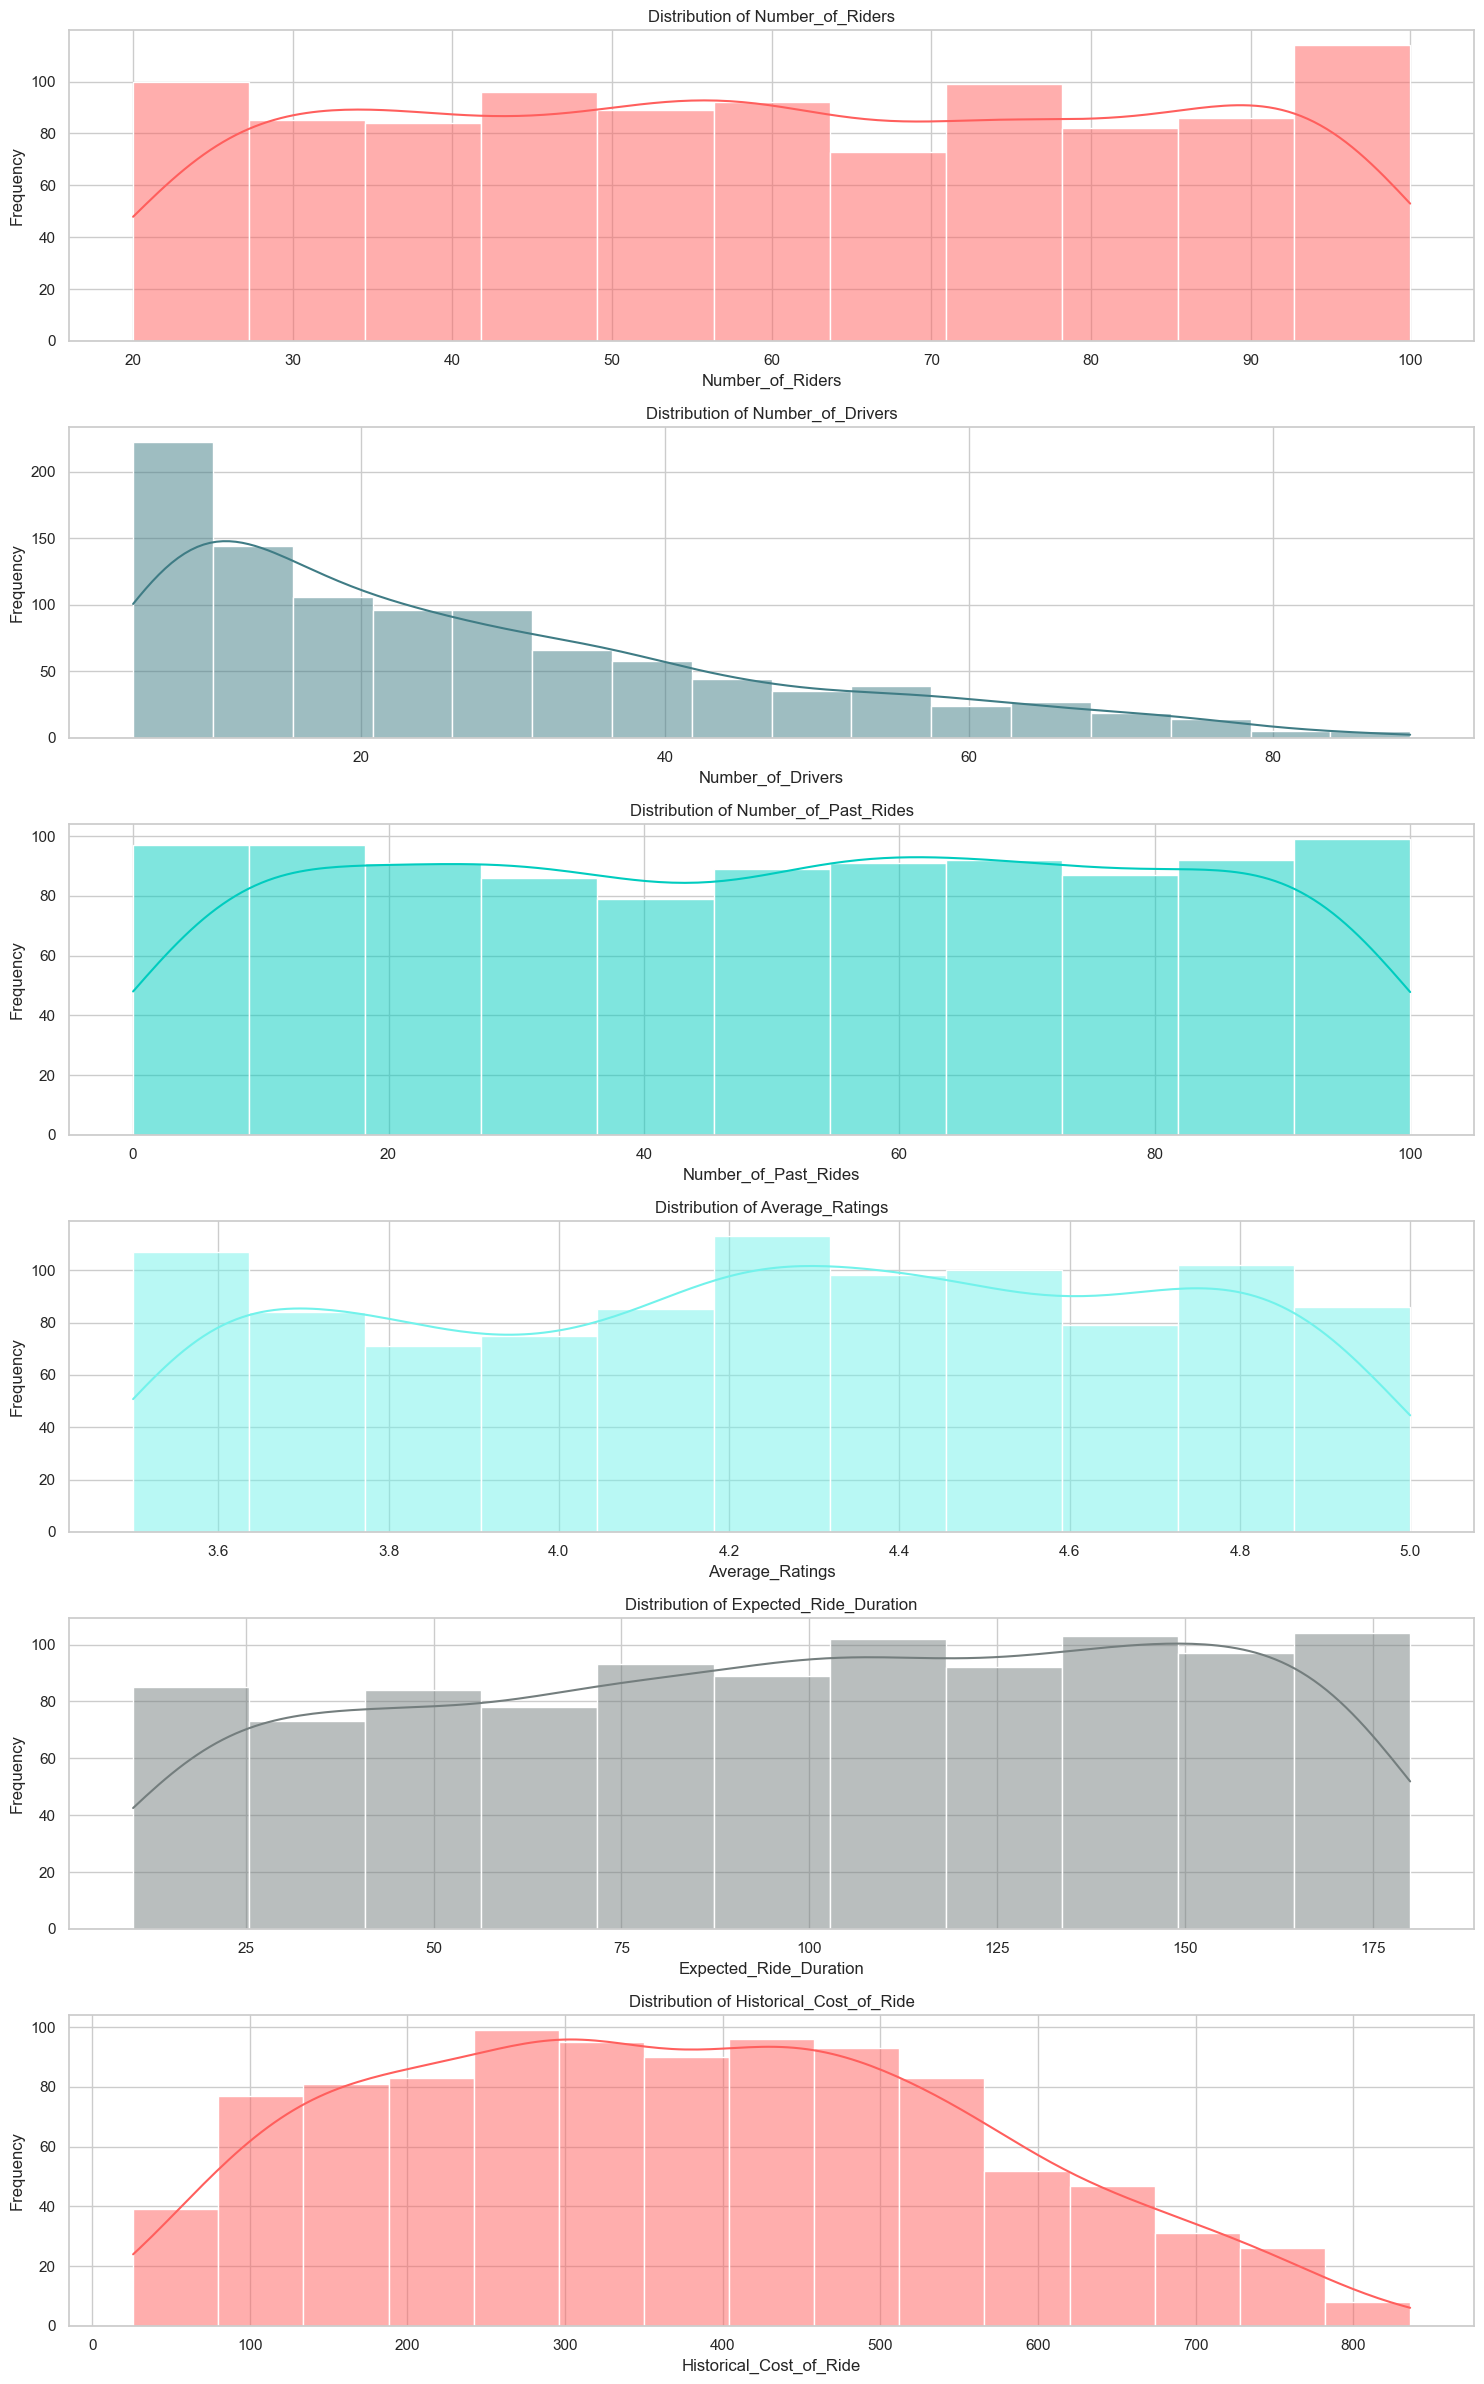

In [ ]:
# Identify numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, len(numerical_features) * 4))

# Loop through each numerical feature and plot
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features), 1, i + 1)
    sns.histplot(df[feature], kde=True, color=sns.color_palette()[i % len(sns.color_palette())])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Index(['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides',
       'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride'],
      dtype='object')

## 5. Exploring the categorical features to understand their distribution.

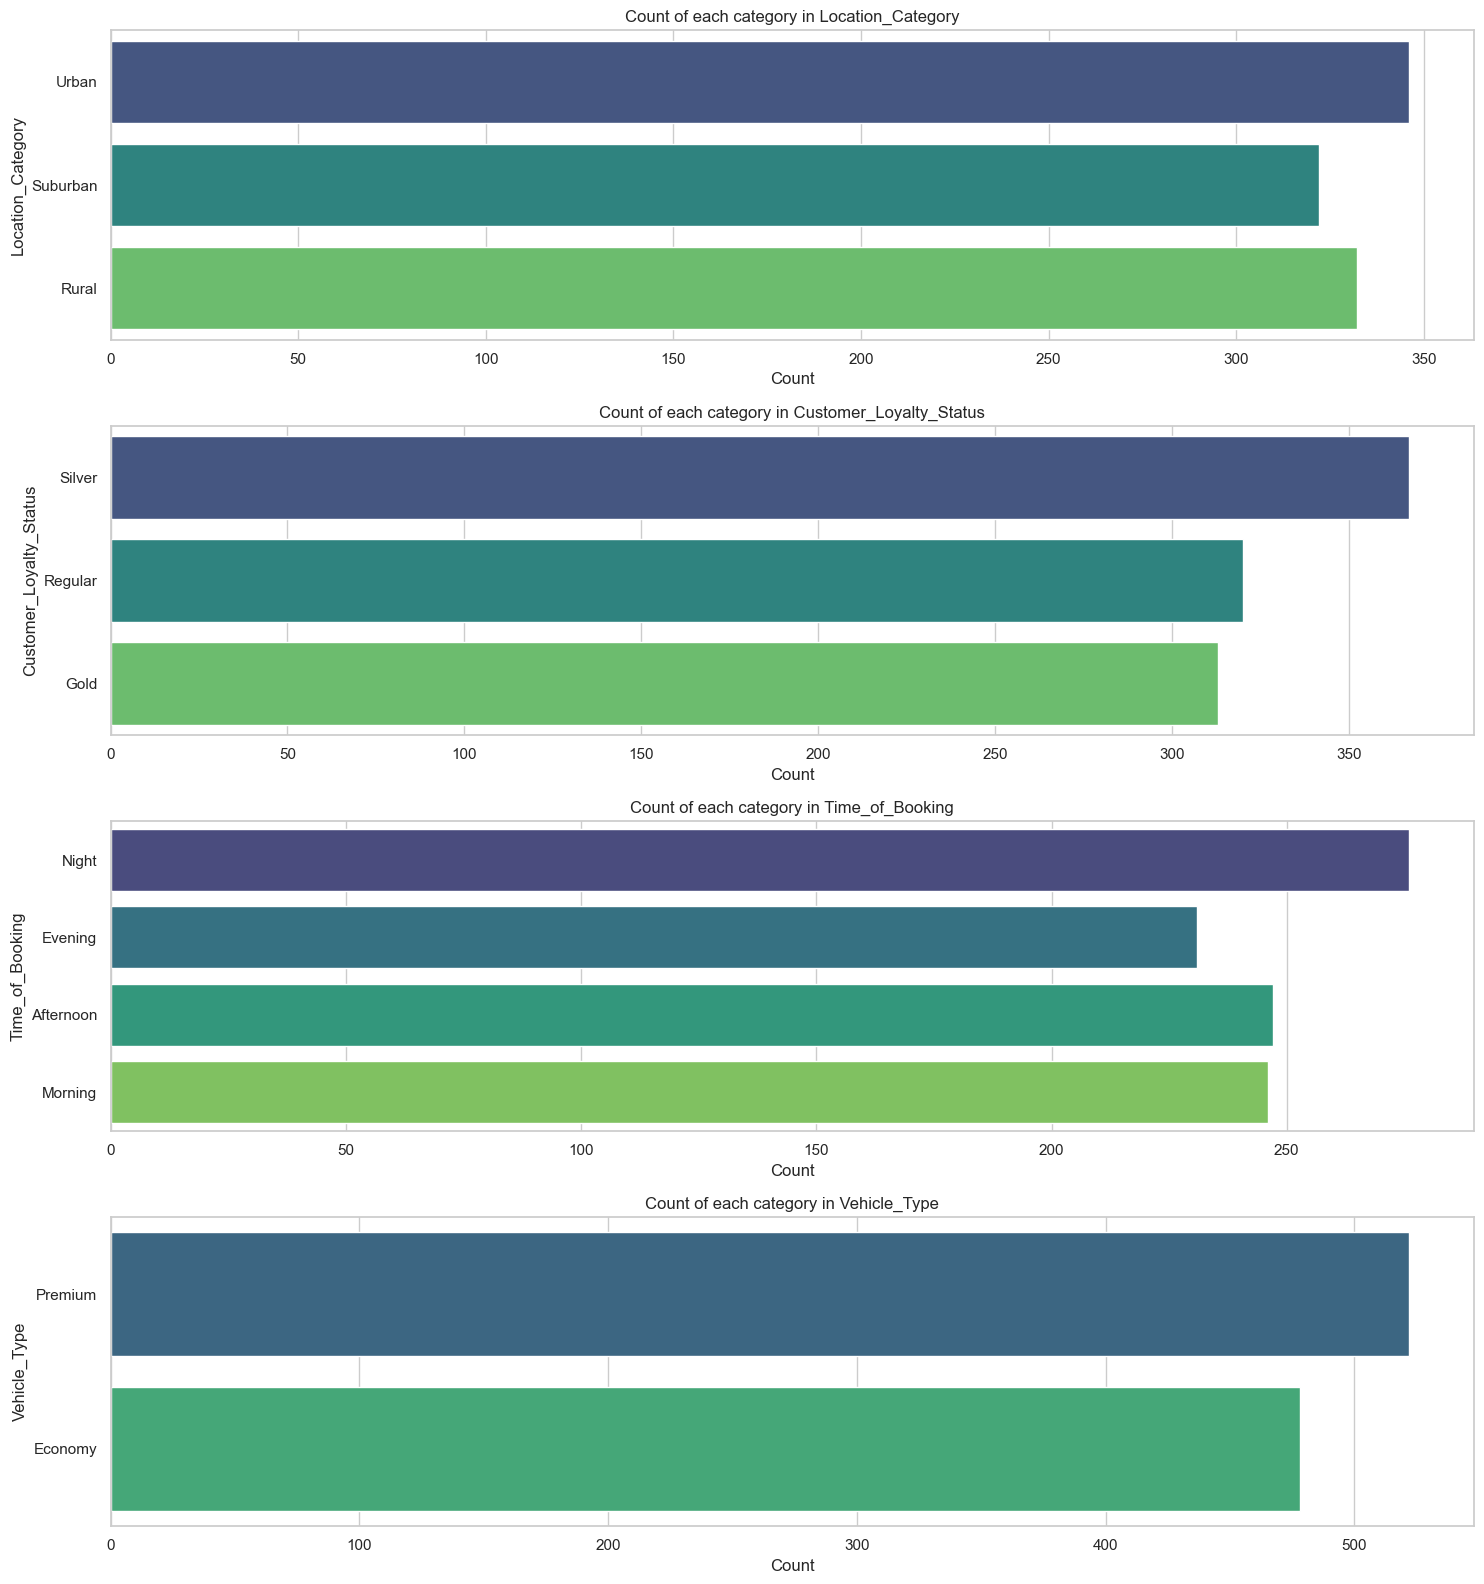

In [ ]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns

# matplotlib
plt.figure(figsize=(15, len(categorical_features) * 4))

# Loop through each categorical feature and plot
for i, feature in enumerate(categorical_features):
    plt.subplot(len(categorical_features), 1, i + 1)
    sns.countplot(y=df[feature], palette='viridis')
    plt.title(f'Count of each category in {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)

plt.tight_layout()

## 7 - Analysis summary categorical features
-- Urban Areas: Urban locations have the highest ride demand, likely due to higher population density and activity levels.

-- Silver Loyalty Membership: Customers with silver loyalty memberships are the most frequent riders, possibly benefiting from perks or discounts.

-- Nighttime Bookings: The majority of rides are booked at night, which could be due to the lower availability of public transport or increased social activities.

-- Premium Cars: The preference for premium cars indicates a demand for luxury and comfort, especially during peak times or for special occasions.
## 7 - Analysis summary numerical features

 * Historical Cost: The most common ride costs are between $250 & 500, suggesting a concentration of rides within this price range.

*
Expected Ride Duration: The ride durations are generally evenly distributed, with a significant portion lasting over an hour, indicating th t longer rides are not uncommo
*

Average Rating: Most rides have an average rating between 4.2 and 4.3, reflecting generally high customer satisfact
* n.

Number of Drivers: There is a decline in driver frequency as the number increases, with most scenarios having 5-10 drivers, indicating a typical team
* ize.

Number of Riders: The distribution of riders is even, but there’s a notable frequency of rides with over 80 riders, indicating a trend toward larger groups



 ## 8.
  Bivariate Analysis


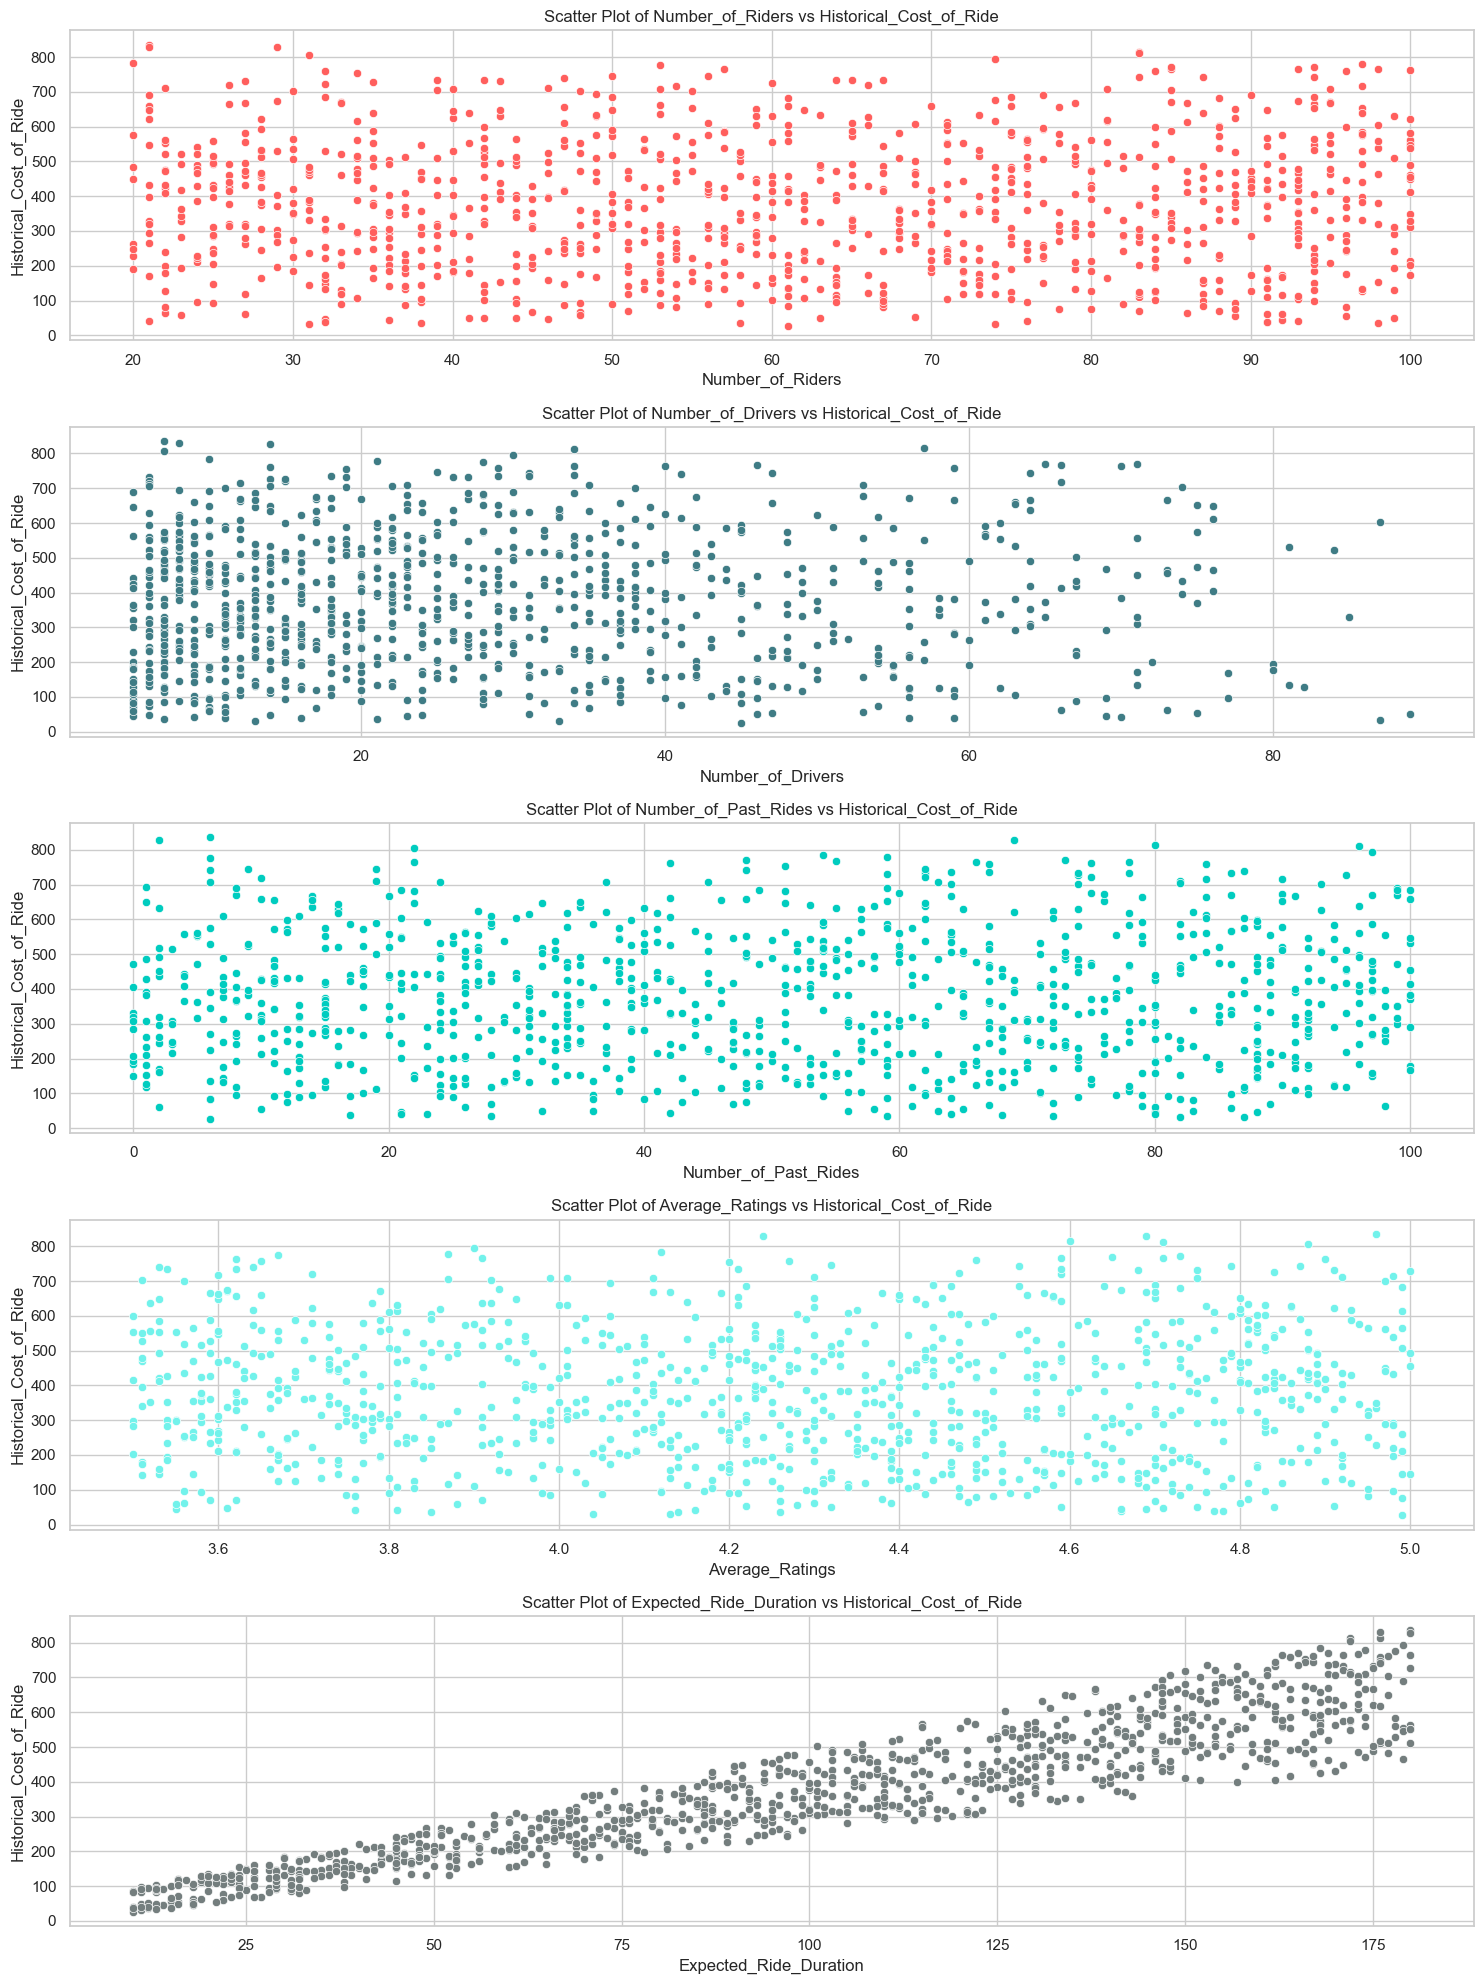

In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop('Historical_Cost_of_Ride')

# Set up the matplotlib figure
plt.figure(figsize=(15, len(numerical_features) * 4))

# Loop through each numerical feature and plot against the target variable
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features), 1, i + 1)
    sns.scatterplot(x=df[feature], y=df['Historical_Cost_of_Ride'], color=sns.color_palette()[i % len(sns.color_palette())])
    plt.title(f'Scatter Plot of {feature} vs Historical_Cost_of_Ride')
    plt.xlabel(feature)
    plt.ylabel('Historical_Cost_of_Ride')

plt.tight_layout()
plt.show()

## 9.  relation between the categorical feature & Historical_Cost_of_Ride

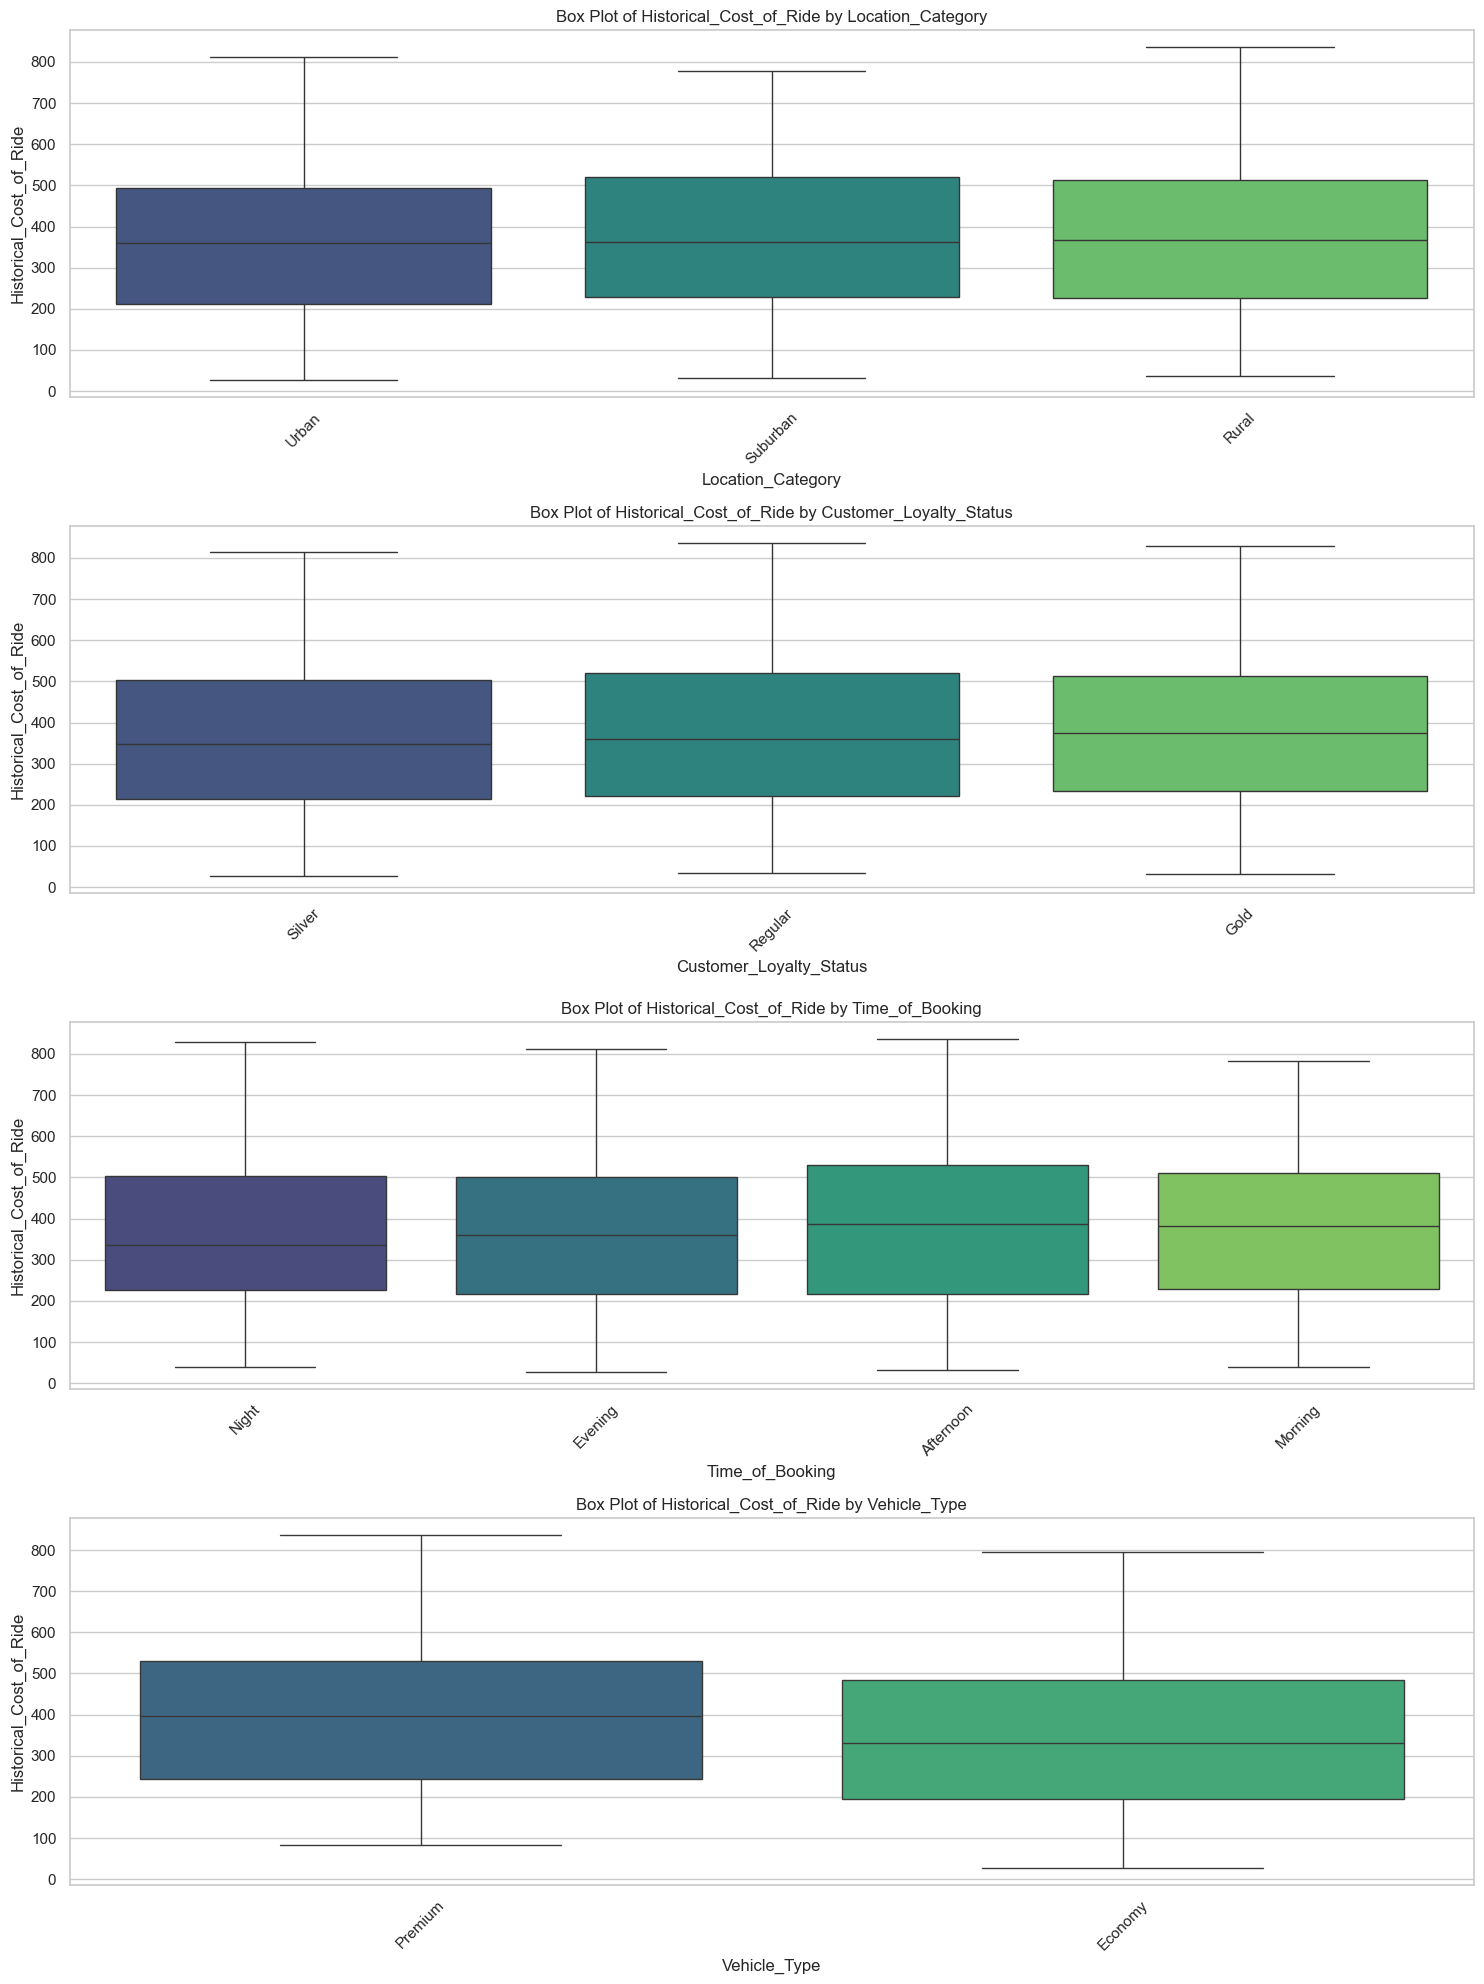

In [ ]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns

# Set up the matplotlib figure
plt.figure(figsize=(15, len(categorical_features) * 5))

# Loop through each categorical feature and plot against the target variable
for i, feature in enumerate(categorical_features):
    plt.subplot(len(categorical_features), 1, i + 1)
    sns.boxplot(x=df[feature], y=df['Historical_Cost_of_Ride'], palette='viridis')
    plt.title(f'Box Plot of Historical_Cost_of_Ride by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Historical_Cost_of_Ride')
    plt.xticks(rotation=45)  # Rotate category labels for readability

plt.tight_layout()
plt.show()

## Potentially Important Features for Predicting Ride Costs: